In [154]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import json
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDClassifier,LogisticRegression,SGDRegressor,LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.utils import shuffle
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [3]:
data=pd.read_pickle("https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/dribble_dataset.pkl?raw=true")
data=shuffle(data)

In [4]:
data

,location,dribble_outcome
3746,"[100.0, 16.0]",Incomplete
3613,"[58.9, 72.0]",Complete
3645,"[112.5, 55.8]",Complete
3612,"[54.0, 31.0]",Incomplete
3360,"[73.4, 2.2]",Complete
...,...,...
3288,"[54.1, 67.1]",Complete
3761,"[107.5, 58.8]",Incomplete
2980,"[86.0, 72.7]",Incomplete
3435,"[36.7, 14.9]",Complete


(array([13786.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22326.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

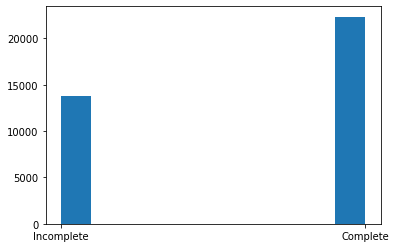

In [37]:
plt.hist(data["dribble_outcome"])

In [21]:
len(data[data["dribble_outcome"]=="Complete"]),len(data[data["dribble_outcome"]=="Incomplete"])

(22326, 13786)

In [24]:
d=data[data["dribble_outcome"]=="Complete"].iloc[:13786]
d=d.append(data[data["dribble_outcome"]=="Incomplete"])

(array([13786.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13786.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

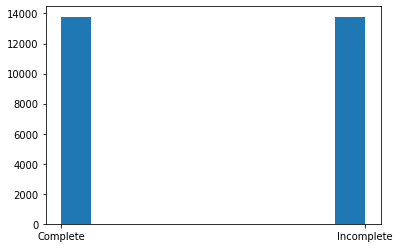

In [27]:
plt.hist(d["dribble_outcome"])

In [136]:
X=np.array(data["location"])

In [137]:
x=[]
for i in X:
  x.append(np.array(i))
x=np.array(x)

In [138]:
x[0]

array([100.,  16.])

In [139]:
x.shape,y.shape

((36112, 2), (2,))

In [140]:
y_label=np.array(data["dribble_outcome"])

In [141]:
y=[]
for i in y_label:
  if i=="Complete":
    y.append(1.0)
  else:
    y.append(0.0)
y=np.array(y)

In [142]:
xx=MinMaxScaler().fit(x)
x=xx.transform(x)

In [143]:
x,y=shuffle(x,y)

In [144]:
x

array([[0.62959866, 0.26433915],
       [0.68561873, 0.80922693],
       [0.96153846, 0.16084788],
       ...,
       [0.7090301 , 0.38279302],
       [0.56605351, 0.84663342],
       [0.76254181, 0.13965087]])

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

0.46687801821329594


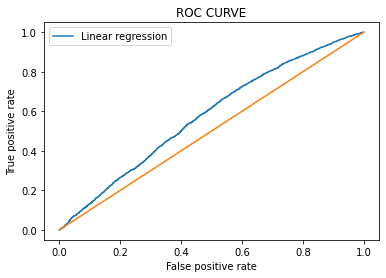

In [158]:
lr=LinearRegression().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
y_train_pred = lr.predict(x_test)
x,y,z=roc_curve(y_test,y_train_pred)
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()

In [159]:
roc_auc_score(y_test,y_train_pred)

0.5767872545658215

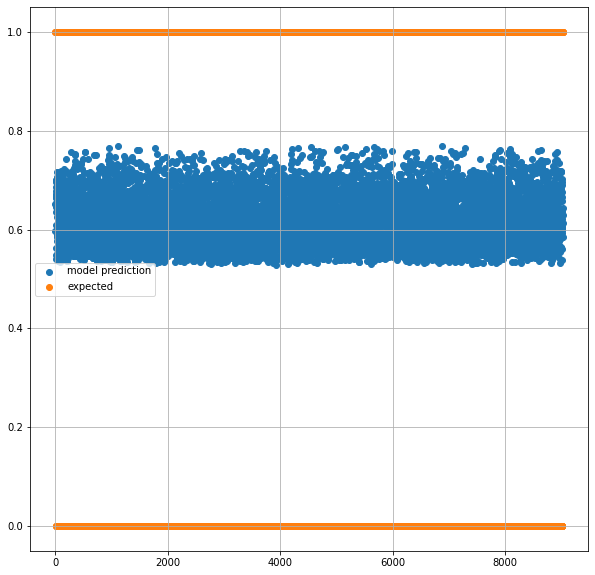

In [160]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.grid()
plt.show()

[19:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4543353234527911


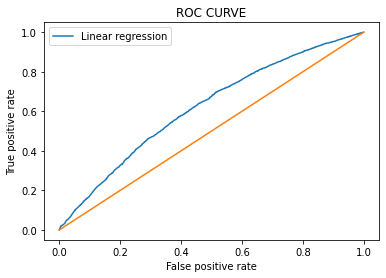

In [156]:
lr=xgboost.XGBRegressor().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
y_train_pred = lr.predict(x_test)
x,y,z=roc_curve(y_test,y_train_pred)
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()

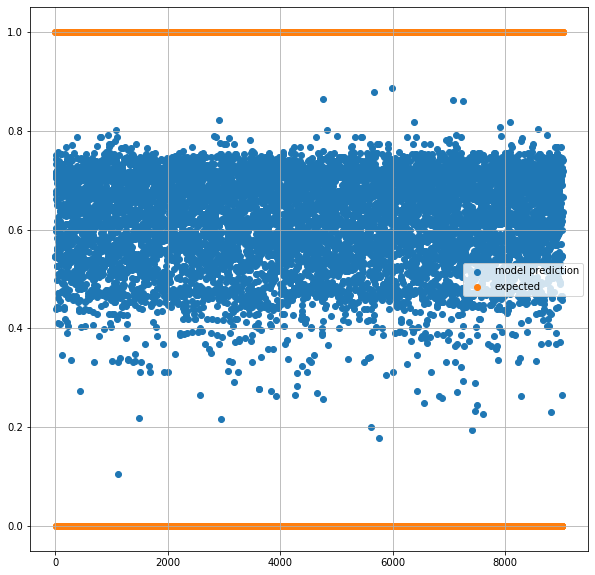

In [157]:
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.grid()
plt.show()

In [149]:
confusion_marix=np.array([[0,0],[0,0]])
for i in range(len(y_test)):
  if y_train_pred[i]<=0.5:
    if y_train[i]==0.0:
      confusion_marix[0][0]+=1
    else:
      confusion_marix[0][1]+=1
  else:
    if y_train[i]==0.0:
      confusion_marix[1][0]+=1
    else:
      confusion_marix[1][1]+=1

In [150]:
np.mean(np.abs(y_train_pred-y_test))

0.4543353234527911

In [112]:
confusion_marix

array([[ 445,  713],
       [2964, 4906]])

In [161]:
import tensorflow as tf
from tensorflow import keras
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1028,input_shape=x_train[0].shape),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1208,activation="relu"),
  keras.layers.Dropout(0.8),
  keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.0005, decay=5e-7),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1028)              3084      
_________________________________________________________________
batch_normalization_6 (Batch (None, 1028)              4112      
_________________________________________________________________
dense_10 (Dense)             (None, 1208)              1243032   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1208)              0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 1208)              4832      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 2418      
Total params: 1,257,478
Trainable params: 1,253,006
Non-trainable params: 4,472
________________________________________

In [162]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
847/847 [==============================] - 15s 16ms/step - loss: 0.8874 - accuracy: 0.5519 - val_loss: 0.6520 - val_accuracy: 0.6217
Epoch 2/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6858 - accuracy: 0.5971 - val_loss: 0.6549 - val_accuracy: 0.6212
Epoch 3/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6786 - accuracy: 0.5991 - val_loss: 0.6551 - val_accuracy: 0.6207
Epoch 4/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6767 - accuracy: 0.5991 - val_loss: 0.6613 - val_accuracy: 0.6057
Epoch 5/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6761 - accuracy: 0.5969 - val_loss: 0.6635 - val_accuracy: 0.6076
Epoch 6/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6781 - accuracy: 0.5984 - val_loss: 0.6541 - val_accuracy: 0.6226
Epoch 7/10
847/847 [==============================] - 13s 16ms/step - loss: 0.6718 - accuracy: 0.6034 - val_loss: 0.6521 - val_accuracy:

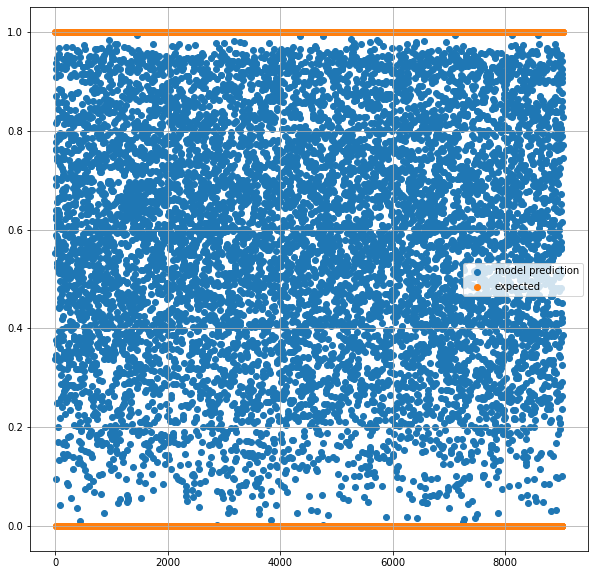

In [167]:
y_train_pred = model.predict(x_test)
mn=min(y_train_pred[:,1])
mx=max(y_train_pred[:,1])
plt.figure(figsize=(10,10))
plt.scatter(np.arange(len(y_train_pred)),(y_train_pred[:,1]-mn)/(mx-mn),label="model prediction")
plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.grid()
plt.show()

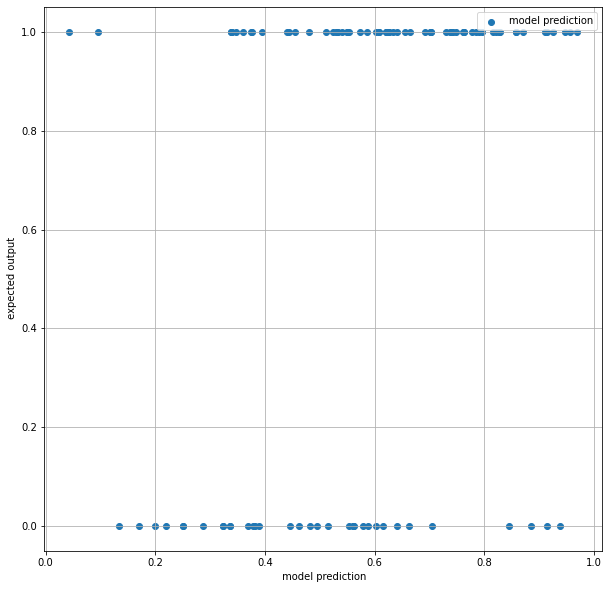

In [168]:
plt.figure(figsize=(10,10))
x_test1=x_test[:100]
y_train_pred=model.predict(x_test1)
y_train_pred=(y_train_pred[:,1]-mn)/(mx-mn)
plt.scatter(y_train_pred,y_test[:100],label="model prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_test,label="expected")
plt.legend()
plt.ylabel(" expected output")
plt.xlabel(" model prediction")
plt.grid()
plt.show()